In [30]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
#globals
TOTAL_FEATURES = 8
BACK_CANDLES = 100
FUTURE_DAYS = 10

def create_stock_dictionary():
    dictionary = {}
    current_directory = os.getcwd()
    folder_name = 'S&P500'
    folder_path = os.path.join(current_directory, folder_name)

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            name = file_name.split("_")[0]
            file_path = os.path.join(folder_path, file_name)
            dictionary[name] = pd.read_csv(file_path)
            
    return dictionary

In [31]:
import random
stock_data = create_stock_dictionary()


In [32]:
ta.macd(stock_data['AAPL']['Close'])

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3343,-2.501985,-0.081261,-2.420724
3344,-2.415672,0.004042,-2.419714
3345,-2.391634,0.022463,-2.414098
3346,-2.353524,0.048459,-2.401983


In [33]:
from sklearn.model_selection import train_test_split
n_days = BACK_CANDLES
m_days = FUTURE_DAYS
stock_data_training = {}
stock_data_testing = {}

#split data for training
for i in stock_data.keys():
    #add more features here
    stock_data[i].rename(columns = {'Datetime':'Date'}, inplace = True)
    stock_data[i]['MACD'] = ta.macd(stock_data[i]['Close'])['MACD_12_26_9']
    stock_data[i]['OBV'] = ta.obv(stock_data[i]['Close'], stock_data[i]['Volume'])
    stock_data[i]['RSI'] = ta.rsi(stock_data[i]['Close'])
    stock_data[i]["TargetNextClose"] = stock_data[i]["Adj Close"].shift(-1)
    stock_data[i].drop(['Close', 'Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
    
    #change scaling algorithm
    scaler = MinMaxScaler()
    for k in range(1, stock_data[i].shape[1]):
        column_data = stock_data[i].iloc[:, k].values.reshape(-1, 1)
        stock_data[i].iloc[:, k] = scaler.fit_transform(column_data)
    
    stock_data_training[i], stock_data_testing[i] = train_test_split(stock_data[i], test_size=0.2, shuffle=False)


In [34]:
stock_data_training['AAPL'].head(30)


,Date,Adj Close,MACD,OBV,RSI,TargetNextClose
0,2022-04-07 09:30:00-04:00,0.640124,NaN,0.609197,NaN,0.623686
1,2022-04-07 10:30:00-04:00,0.623686,NaN,0.597347,NaN,0.624225
2,2022-04-07 11:30:00-04:00,0.624225,NaN,0.606871,NaN,0.628133
3,2022-04-07 12:30:00-04:00,0.628133,NaN,0.617754,NaN,0.634735
4,2022-04-07 13:30:00-04:00,0.634735,NaN,0.626600,NaN,0.647834
5,2022-04-07 14:30:00-04:00,0.647834,NaN,0.637660,NaN,0.641337
6,2022-04-07 15:30:00-04:00,0.641337,NaN,0.625712,NaN,0.615872
7,2022-04-08 09:30:00-04:00,0.615872,NaN,0.600317,NaN,0.624225
8,2022-04-08 10:30:00-04:00,0.624225,NaN,0.615290,NaN,0.634398
9,2022-04-08 11:30:00-04:00,0.634398,NaN,0.625950,NaN,0.623148


In [35]:
stock_data_testing['AAPL'].head(20)

,Date,Adj Close,MACD,OBV,RSI,TargetNextClose
2678,2023-10-17 14:30:00-04:00,0.703315,0.494693,0.643682,0.412723,0.708300
2679,2023-10-17 15:30:00-04:00,0.708300,0.492825,0.651929,0.447867,0.701293
2680,2023-10-18 09:30:00-04:00,0.701293,0.486325,0.636592,0.410875,0.702776
2681,2023-10-18 10:30:00-04:00,0.702776,0.483304,0.645900,0.422113,0.703988
2682,2023-10-18 11:30:00-04:00,0.703988,0.482822,0.652915,0.431761,0.708030
2683,2023-10-18 12:30:00-04:00,0.708030,0.486678,0.659938,0.464552,0.702304
2684,2023-10-18 13:30:00-04:00,0.702304,0.485793,0.653992,0.427847,0.691322
2685,2023-10-18 14:30:00-04:00,0.691322,0.476848,0.647107,0.364359,0.689989
2686,2023-10-18 15:30:00-04:00,0.689989,0.469688,0.638658,0.357076,0.695769
2687,2023-10-19 09:30:00-04:00,0.695769,0.469903,0.653163,0.410548,0.696307


In [36]:
#code that lets you select which stocks you want to train on, so you can use other stocks to train
vals = stock_data_training.values()
training_vals = ['AAPL', 'MSFT', 'YUM', 'XYL', 'GOOG']
training_df_list = []
for key in stock_data_training.keys():
    for item in training_vals:
        if(key == item):
            training_df_list.append(stock_data_training[key])
            

stacked_stock_data = pd.concat(training_df_list, ignore_index=True, axis=0)
stacked_stock_data = stacked_stock_data.dropna()
stacked_stock_data



,Date,Adj Close,MACD,OBV,RSI,TargetNextClose
25,2022-04-12 13:30:00-04:00,0.570747,0.370675,0.564465,0.395615,0.573161
26,2022-04-12 14:30:00-04:00,0.573161,0.375092,0.576897,0.409791,0.580302
27,2022-04-12 15:30:00-04:00,0.580302,0.386583,0.588687,0.451868,0.594449
28,2022-04-13 09:30:00-04:00,0.594449,0.409292,0.609293,0.528512,0.607922
29,2022-04-13 10:30:00-04:00,0.607922,0.439973,0.622082,0.592738,0.618029
...,...,...,...,...,...,...
13385,2023-10-17 09:30:00-04:00,0.380084,0.595595,0.708981,0.616715,0.377707
13386,2023-10-17 10:30:00-04:00,0.377707,0.616226,0.704262,0.605855,0.390386
13387,2023-10-17 11:30:00-04:00,0.390386,0.641284,0.708179,0.642920,0.378500
13388,2023-10-17 12:30:00-04:00,0.378500,0.650684,0.704754,0.586728,0.366878


In [37]:
xs, ys = [], []
#for actuallly training data
for i in range(len(stacked_stock_data) - n_days - m_days + 1): 

    v = stacked_stock_data.iloc[i:(i + n_days), :-1]

    if v['Date'].iloc[-1] <= v['Date'].iloc[0]: 
        continue

    xs.append(v.iloc[:, 1:].to_numpy())
    ys.append(stacked_stock_data.iloc[i + n_days:i + n_days + m_days, len(stacked_stock_data.columns) - 1])
xs = np.array(xs)
ys = np.array(ys)


In [38]:
xs[0]

array([[0.5707465 , 0.37067506, 0.56446528, 0.39561536],
       [0.57316093, 0.37509221, 0.5768965 , 0.40979107],
       [0.58030185, 0.38658311, 0.58868721, 0.45186758],
       [0.59444902, 0.40929193, 0.60929278, 0.52851246],
       [0.60792248, 0.43997255, 0.62208202, 0.59273761],
       [0.61802881, 0.47375858, 0.63528781, 0.6365334 ],
       [0.61964433, 0.50255548, 0.64427384, 0.6434647 ],
       [0.61587177, 0.52264974, 0.63630154, 0.62046247],
       [0.62287803, 0.54463011, 0.6456489 , 0.65334396],
       [0.61748852, 0.55756418, 0.63491351, 0.61845032],
       [0.59148485, 0.54617841, 0.61190634, 0.47688284],
       [0.58852067, 0.53496336, 0.6015176 , 0.46301154],
       [0.57114   , 0.51206159, 0.59203256, 0.38782864],
       [0.56575049, 0.49020274, 0.58428748, 0.36665734],
       [0.56722312, 0.4750974 , 0.59314308, 0.37641717],
       [0.55638654, 0.45525361, 0.58193296, 0.33260627],
       [0.54850448, 0.43437218, 0.56872618, 0.30305569],
       [0.56022632, 0.42916336,

In [39]:
X_test = []
Y_test = []

for key, df in stock_data_testing.items():
    if(key == 'WY'):
        if len(df) >= n_days + m_days:
            for i in range(len(df) - n_days - m_days + 1):
                X_test.append(df.iloc[i:i+n_days, 1:-1].to_numpy())

            for i in range(len(df) - n_days - m_days + 1):
                Y_test.append(df.iloc[i+n_days:i+n_days+m_days, -1].to_numpy())

X_test = np.array(X_test)
Y_test = np.array(Y_test)

X_test

array([[[0.17633554, 0.58513375, 0.52659275, 0.46441827],
        [0.17046974, 0.57972558, 0.51311984, 0.42730668],
        [0.15067107, 0.5627226 , 0.50648867, 0.32331367],
        ...,
        [0.22315429, 0.83924015, 0.53598022, 0.64429125],
        [0.22046979, 0.82070005, 0.53139845, 0.62883287],
        [0.22483225, 0.80620261, 0.54375163, 0.6439063 ]],

       [[0.17046974, 0.57972558, 0.51311984, 0.42730668],
        [0.15067107, 0.5627226 , 0.50648867, 0.32331367],
        [0.15201339, 0.55042683, 0.51009698, 0.33320602],
        ...,
        [0.22046979, 0.82070005, 0.53139845, 0.62883287],
        [0.22483225, 0.80620261, 0.54375163, 0.6439063 ],
        [0.21912748, 0.78856255, 0.53585572, 0.60870789]],

       [[0.15067107, 0.5627226 , 0.50648867, 0.32331367],
        [0.15201339, 0.55042683, 0.51009698, 0.33320602],
        [0.15000004, 0.53980085, 0.5058948 , 0.32327598],
        ...,
        [0.22483225, 0.80620261, 0.54375163, 0.6439063 ],
        [0.21912748, 0.788562

In [40]:
from keras.layers import LSTM
from keras.layers import Dense
import tensorflow as tf
from keras import Sequential
from keras import optimizers
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dense, GRU, LeakyReLU
num_features = 4
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_days, num_features), return_sequences=False))
model.add(Dense(m_days))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xs, ys, epochs=5, batch_size=32, validation_split=0.2)



c:\Users\Rober\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 32s 94ms/step - loss: 19.7382 - val_loss: 0.0121
Epoch 2/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 34s 105ms/step - loss: 0.0059 - val_loss: 0.0035
Epoch 3/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 31s 97ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 4/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 5/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 34s 105ms/step - loss: 0.0018 - val_loss: 0.0025


In [41]:
y_pred = model.predict(X_test)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [42]:
y_pred.shape

(561, 10)

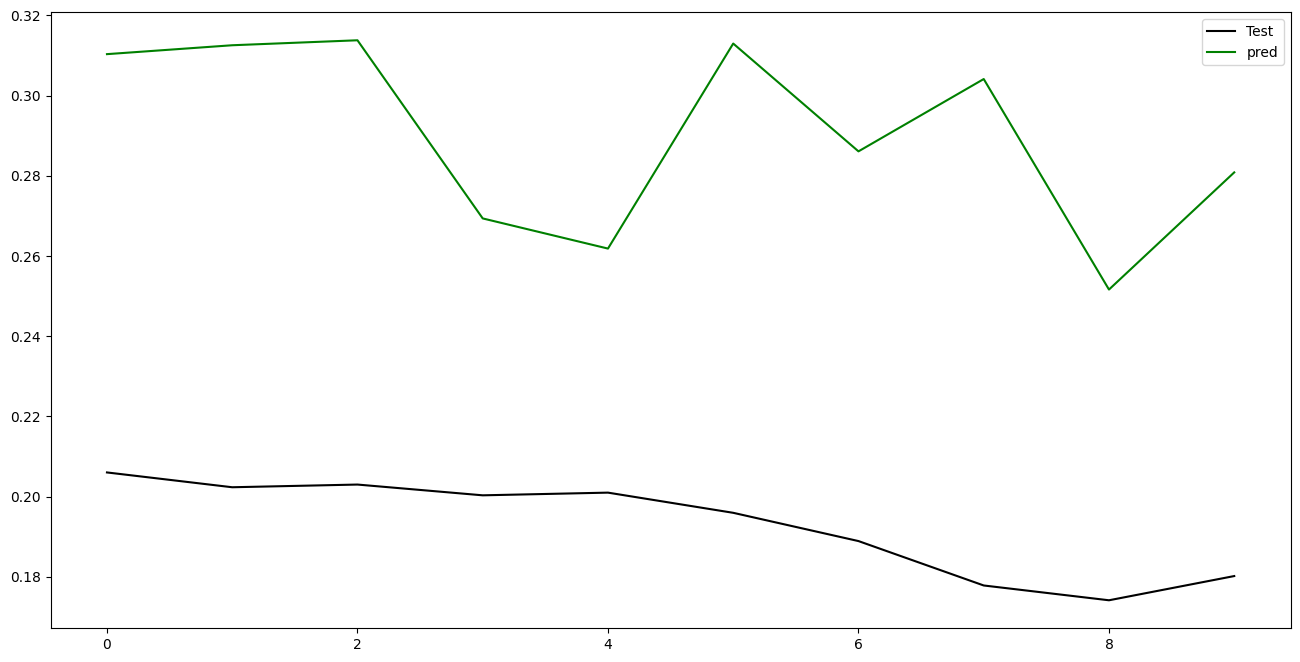

In [45]:
plt.figure(figsize=(16,8))
plt.plot(Y_test[0], color = 'black', label = 'Test')
plt.plot(y_pred[0], color = 'green', label = 'pred')
plt.legend()
plt.show()